# 💪 Chapter 3. Part 3: Multivariate Goodness of Fit

In this section, we will conduct Multivariate Goodness of Fit analysis. Like the previous sections, we will continue to utilize the Boston dataset. Let's go!

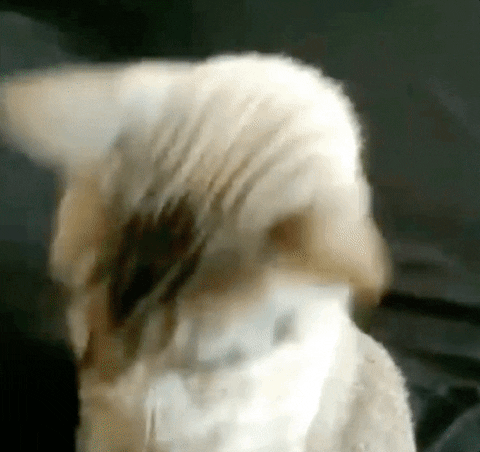

#### 📚 Theory Summary

Multivariate Goodness of Fit assesses how well a model fits multivariate data by examining the agreement between observed and predicted values across multiple variables simultaneously. It measures the overall adequacy of a statistical model in representing the underlying relationship between variables.

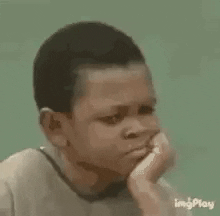



### 📦 Load Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

import warnings
warnings.filterwarnings("ignore")

### 🔢 Load Data

In [2]:
Boston = load_data('Boston')

We will begin by computing the Variance Inflation Factor (VIF) using the `variance_inflation_factor()` function.

#### List Comprehension

In [3]:
terms = Boston.columns.drop('medv') # drop 'medv'
X = MS(terms).fit_transform(Boston) # fit all terms
y = Boston['medv']  # Add this line to define the response variable
model = sm.OLS(y, X).fit()

In [4]:
vals = [VIF(model.model.exog, i) for i in range(1,X.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=X.columns[1:])
vif

vif
crim     1.767486
zn       2.298459
indus    3.987181
chas     1.071168
nox      4.369093
rm       1.912532
age      3.088232
dis      3.954037
rad      7.445301
tax      9.002158
ptratio  1.797060
lstat    2.870777

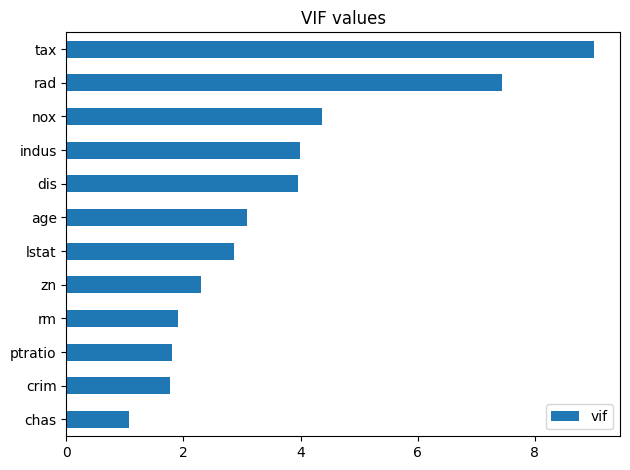

In [5]:
# plot horizontal bar chart of VIF values ranking from highest to lowest
fig, ax = subplots()
vif.sort_values('vif').plot(kind='barh', ax=ax)
ax.set_title('VIF values')
fig.tight_layout()
fig.show()

#### 🤔 Recall:

The VIF values indicate the extent of multicollinearity between predictor variables in a regression model. Higher VIF values suggest stronger correlations between predictors, indicating potential issues with multicollinearity. In this case:
- Variables with VIF values close to 1 have low multicollinearity.
- Variables with VIF values between 1 and 5 have moderate multicollinearity.
- Variables with VIF values above 5 indicate potentially problematic multicollinearity, requiring further investigation or potential variable exclusion from the model.


# On to the next one ➜

Next, we will delve into `Interaction Terms`.

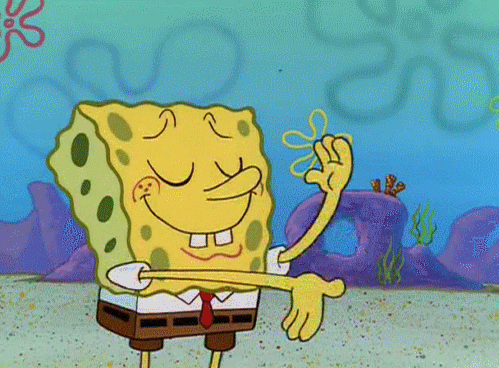